In [11]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [12]:
%matplotlib widget

In [30]:
#set a random seed for reproducibility
np.random.seed(42)

#generate random values for x
x = np.random.rand(100) * 10  # 100 random values between 0 and 10

#generate y values based on a linear function with some noise
y = 2 * x + np.random.normal(0, 1, 100)  
# y = 2x + noise   y=mx + b, m=slope, b=y-intercept, x is the independent variable

In [ ]:
#create a figure and scatter plot with labels
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, color='blue', label='Data points')
# plt.title('Scatter Plot of Randomly Generated Data')
# plt.xlabel('Independent Variable (x)')
# plt.ylabel('Dependent Variable (y)')
# plt.legend()
# plt.grid(True)
# plt.show()


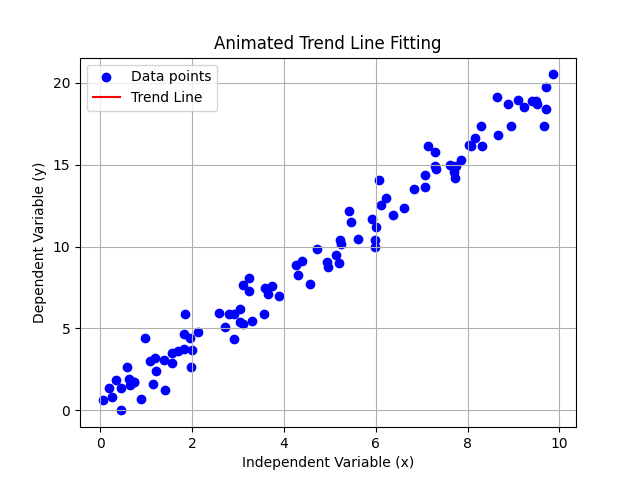

In [31]:
# Set up figure with initial scatter (done once)
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', label='Data points')  # Persistent scatter
ax.set_title('Animated Trend Line Fitting')
ax.set_xlabel('Independent Variable (x)')
ax.set_ylabel('Dependent Variable (y)')
ax.legend()
ax.grid(True)

# Initialize empty line
line, = ax.plot([], [], color='red', label='Trend Line')
ax.legend()  # Update legend for line

def init():
    line.set_data([], [])
    return line,

def update(frame):
    # Dynamically change slope over frames (0 to 3)
    slope = frame * 0.03  # e.g., frame 0-100 -> slope 0 to 3
    y_pred = slope * x  # Simple line (add intercept if needed)
    line.set_data(x, y_pred)
    return line,

# Create animation: 100 frames, 100ms interval
ani = FuncAnimation(fig, update, frames=100, init_func=init, interval=100, blit=True)

# Display as HTML5 video in Jupyter
# HTML(ani.to_html5_video())

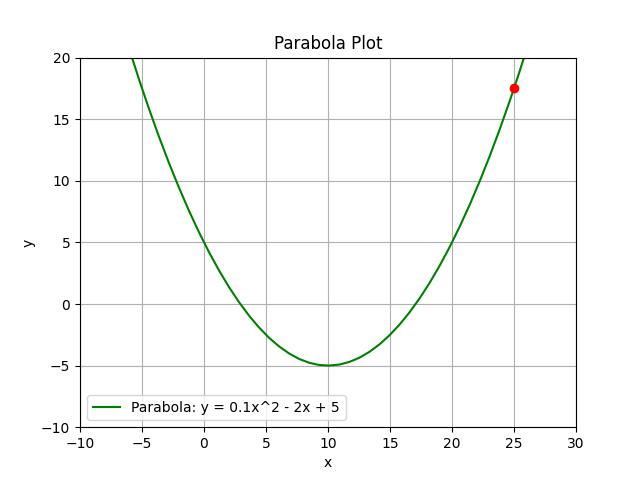

In [38]:
# make a graph that shows a parabola
# Create a new figure for the parabola
fig_parabola, ax_parabola = plt.subplots()
# Generate x values for the parabola
x_parabola = np.linspace(-40, 40, 100)
# Generate y values for the parabola (y = ax^2 + bx + c)
y_parabola = 0.1 * x_parabola**2 - 2 * x_parabola + 5
# Plot the parabola
ax_parabola.plot(x_parabola, y_parabola, color='green', label='Parabola: y = 0.1x^2 - 2x + 5')
# Add labels and title
ax_parabola.set_title('Parabola Plot')
ax_parabola.set_xlabel('x')
ax_parabola.set_ylabel('y')
ax_parabola.legend()
# Add grid for better readability
ax_parabola.grid(True)
# zoom out to see the whole parabola twice
ax_parabola.set_xlim(-10, 30)
ax_parabola.set_ylim(-10, 20)
#set a red point on the parabola at x=25
ax_parabola.plot(25, 0.1 * 25**2 - 2 * 25 + 5, 'ro')  # Red point at x=25

#animate the red point moving fast down the parabola
def update_parabola(frame):
    # Calculate the new x position for the red point
    x_red = 25 - frame * 0.5  # Move left along the parabola
    if x_red < -10:  # Stop moving when x is less than -10
        x_red = -10
    y_red = 0.1 * x_red**2 - 2 * x_red + 5
    # Update the red point's position
    ax_parabola.lines[1].set_data(x_red, y_red)
    return ax_parabola.lines[1],

# Create animation for the red point
ani_parabola = FuncAnimation(fig_parabola, update_parabola, frames=np.arange(0, 50), interval=100, blit=True)

# Show the parabola plot
# plt.show()